<a href="https://colab.research.google.com/github/Aashrut/Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [17]:
# Imports Required Libraries
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

import numpy as np

# load Heart dataset
df = pd.read_csv('heart.csv')

Text(0.5, 1.0, 'heart failure Correlation')

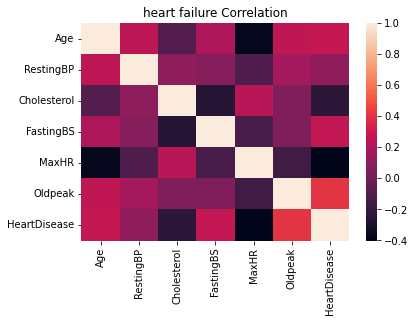

In [18]:
#Data Visualisation
plt.figure(1)
sns.heatmap(df.corr())
plt.title('heart failure Correlation')

In [19]:
#Preprocess data: converting string to numeric
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

df['Sex']=lbl.fit_transform(df['Sex'])
df['RestingECG']=lbl.fit_transform(df['RestingECG'])
df['ChestPainType']=lbl.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=lbl.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=lbl.fit_transform(df['ST_Slope'])


In [20]:
# Split Heart dataset into training/testing data
X = df.drop('HeartDisease', axis=1).values
X = X.reshape(-1,11)
y = df['HeartDisease'].values
y =y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 300)

# initializing scaler object
from sklearn.pipeline import Pipeline

# standardizing the datasets
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)            


In [21]:
from sklearn.ensemble import AdaBoostClassifier

#Create the Adaboost Classifier
adaBoost_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=300)

#Create the Stacking Classifier
logR_clf = LogisticRegression()  # defining meta-classifier
knn_clf = KNeighborsClassifier()   # initialising KNeighbors Classifier
NB_clf = GaussianNB()              # initialising Naive Bayes
stack_clf = StackingClassifier(classifiers =[knn_clf, NB_clf], meta_classifier = logR_clf, 
                               use_probas = True, use_features_in_secondary = True)

# Train the AdaBoost classifier
model = adaBoost_clf.fit(X_train_new, y_train)
adaboost_test_pred = model.predict(X_test_new)

# Train the Stacking classifier
model_stack = stack_clf.fit(X_train_new, y_train)   
stack_test_pred = model_stack.predict(X_test_new)

Adaboost Model Performance on the Training Dataset:
accuracy score: 86.9159%

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       274
           1       0.87      0.91      0.89       368

    accuracy                           0.87       642
   macro avg       0.87      0.86      0.87       642
weighted avg       0.87      0.87      0.87       642


Confusion Matrix: 
 [[224  50]
 [ 34 334]]



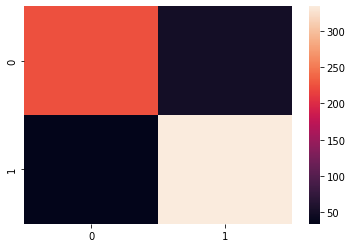

Adaboost Model Performance on the Testing Dataset:
accuracy score: 86.5942%

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       136
           1       0.83      0.93      0.88       140

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276


Confusion Matrix: 
 [[109  27]
 [ 10 130]]



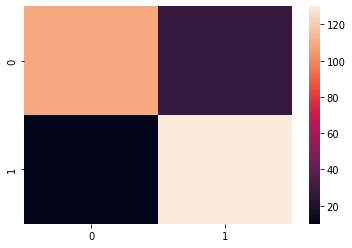

Stacking Model Performance on the Training Dataset:
accuracy score: 89.7196%

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       274
           1       0.90      0.92      0.91       368

    accuracy                           0.90       642
   macro avg       0.90      0.89      0.89       642
weighted avg       0.90      0.90      0.90       642


Confusion Matrix: 
 [[237  37]
 [ 29 339]]



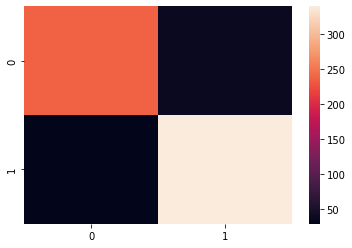

Stacking Model Performance on the Testing Dataset:
accuracy score: 86.9565%

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       136
           1       0.84      0.92      0.88       140

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276


Confusion Matrix: 
 [[111  25]
 [ 11 129]]



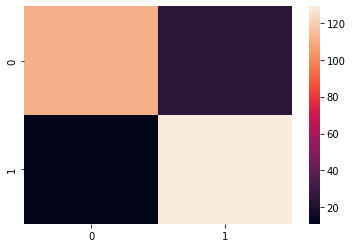

In [29]:
def print_score(st, y, y_pred):
        print(st)
        print("accuracy score: {0:.4f}%\n".format(accuracy_score(y, y_pred)*100))
        print("Classification Report: \n {}\n".format(classification_report(y, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y, y_pred)))
        sns.heatmap(pd.DataFrame(confusion_matrix(y,y_pred)))
        plt.show()
        
#print Adaboost classifier model metrics results
print_score("Adaboost Model Performance on the Training Dataset:", y_train, adaboost_train_pred)
print_score("Adaboost Model Performance on the Testing Dataset:", y_test, adaboost_test_pred)


#print Stacking classifier model metrics results
print_score("Stacking Model Performance on the Training Dataset:", y_train, stack_train_pred)
print_score("Stacking Model Performance on the Testing Dataset:" , y_test, stack_test_pred)

Optimized Stacking Model Performance on the Testing Dataset:
accuracy score: 88.0435%

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       136
           1       0.85      0.93      0.89       140

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276


Confusion Matrix: 
 [[113  23]
 [ 10 130]]



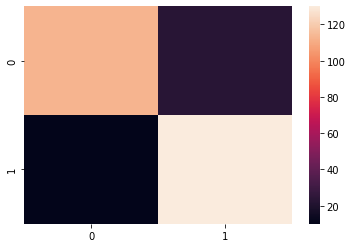

In [25]:
from sklearn.model_selection import GridSearchCV

sclf = StackingClassifier(classifiers=[knn_clf, NB_clf], meta_classifier=logR_clf)
params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'meta_classifier__C': [0.1, 10.0]}
grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_test_new, y_test)             
optimal_Stacking_pred= grid.predict(X_test_new)
print_score("Optimized Stacking Model Performance on the Testing Dataset:", y_test, optimal_Stacking_pred)

Optimized AdaBoost Model Performance on the Testing Dataset:
accuracy score: 88.0435%

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       136
           1       0.85      0.93      0.89       140

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276


Confusion Matrix: 
 [[113  23]
 [ 10 130]]



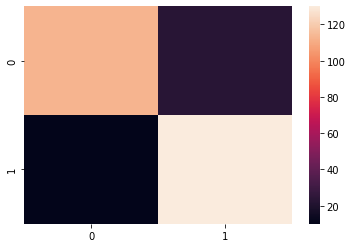

In [30]:

ada_params={'n_estimators':[50,100,200],'learning_rate':[.001,0.01,.1]}
gsearch=GridSearchCV(estimator=adaBoost_clf,param_grid=ada_params,scoring='accuracy',n_jobs=1,cv=5)
gsearch.fit(X_test_new, y_test)             
optimal_boost_pred= grid.predict(X_test_new)
print_score("Optimized AdaBoost Model Performance on the Testing Dataset:" , y_test, optimal_boost_pred)